<h1> Machine Learning Portfolio </h1>
</br>
Dieser Datensatz enthält alle aktuellen und aktiven Geschäftslizenzen, die von der Abteilung für Unternehmensangelegenheiten und Verbraucherschutz ausgestellt wurden.[^1] 
Einzelene Spalten wurden vom Herausgeber wie folgt beschrieben:
</br>
</br>
1. APPLICATION TYPE: 
<li>"ISSUE" ist der Eintrag, der mit dem ersten Lizenzantrag verbunden ist. 
<li>"RENEW" ist ein Eintrag für eine spätere Erneuerung. Alle Einträge werden mit einem Datum für den Beginn und das Ende der Gültigkeitsdauer erstellt. 
<li>"C_LOC" ist ein Eintrag über eine Standortverlegung. Dies bedeutet, dass das Unternehmen umgezogen ist. 
<li>"C_CAPA" ist ein Beleg für die Änderung der Kapazität. Nur wenige Lizenztypen können diese Art von Antrag stellen. 
<li>"C_EXPA" gilt nur für Unternehmen, die über eine Schanklizenz verfügen. Dies bedeutet, dass der Standort des Unternehmens erweitert wurde.[^2] 
</br>
</br>
2. LICENSE STATUS: 
<li>"AAI" bedeutet, dass die Lizenz erteilt wurde.
<li>"AAC" bedeutet, dass die Lizenz während ihrer Laufzeit gekündigt wurde.
<li>"REV" bedeutet, dass die Lizenz widerrufen wurde.
<li>"REA" bedeutet, dass der Entzug der Lizenz angefochten worden ist.[^3] 

</br>

[^1] : [Business License Data](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data)

[^2] : [Business License Data](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data)

[^3] : [Business License Data](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data)
    
    

In dieser Arbeit werden die folgende Punkte behandelt:
1. **Data Exploration/Cleaning/Outlier detection**
2. **Data Preparation** Hinweis: bei diesem Datensatz könn(t)en zusammengesetzte, bzw berechnete Werte aussagekräftig sein
3. **Model building** d.h. Auswahl verschiedener Modelle inkl Analyse der Vor- und Nachteile für die gegebenen Daten, bzw Fragestellung
4. **Classification Metrics**
5. **Feature Importance**

<h2> 1. Data Exploration/Cleaning/Outlier detection </h2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("License_Data.csv")
pd.set_option('display.max_columns', None)

c:\users\jaxxi\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [4]:
data.shape

(85895, 32)

<h3> Look at the target variable </h3>

In [28]:
data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

<h3> Handelling Null Data </h3>

In [5]:
data.isna().sum()/len(data)*100

ID                                    0.000000
LICENSE ID                            0.000000
ACCOUNT NUMBER                        0.000000
SITE NUMBER                           0.000000
LEGAL NAME                            0.000000
DOING BUSINESS AS NAME                0.001164
ADDRESS                               0.000000
CITY                                  0.000000
STATE                                 0.000000
ZIP CODE                              0.036091
WARD                                 57.862507
PRECINCT                             66.011991
WARD PRECINCT                        57.861342
POLICE DISTRICT                      62.881425
LICENSE CODE                          0.000000
LICENSE DESCRIPTION                   0.000000
LICENSE NUMBER                        0.001164
APPLICATION TYPE                      0.000000
APPLICATION CREATED DATE             75.277956
APPLICATION REQUIREMENTS COMPLETE     0.249141
PAYMENT DATE                          1.500669
CONDITIONAL A

In [6]:
#drops Colums with too many null values
data = data.drop(columns=data.columns[((data.isna().sum()/len(data)) > 0.60)])
data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'WARD PRECINCT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

<h3> Drop unuseful columns </h3>

In [9]:
data = data.drop(["ADDRESS"], axis = 1)
#we already have coordinates aswell as city, state, zip code and so on.. no need to have the adress
#plus this column is very bad formated

In [16]:
data = data.drop(["LOCATION"], axis = 1)
#we have latetude and longetude in separted columns- don't need a dictonary

<h2> 2. Data Preperation </h2>


<h2> 3. Model building </h2>

<h2> 4. Classification Metrics </h2>

<h2> 5. Feature Importance </h2>

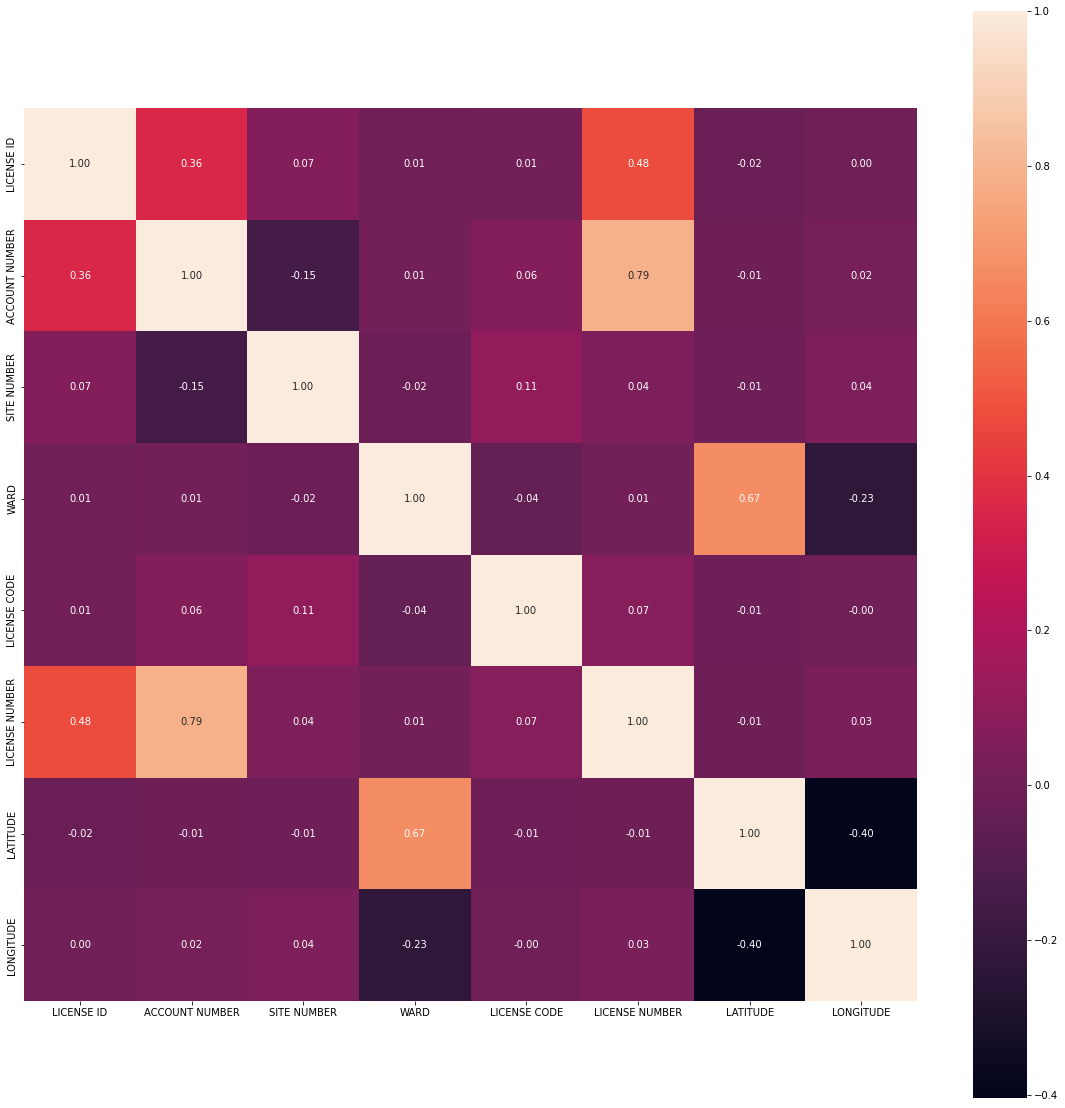

In [15]:
#creates a Correlation Matrix
def correlation_matrix(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)
    
correlation_matrix(data)    

In [7]:
data.shape

(85895, 27)

In [17]:
data

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,WARD PRECINCT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LATITUDE,LONGITUDE,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,22-28,1010,Limited Business License,35342.0,RENEW,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,41.843613,-87.714618,AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,33-23,1315,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,41.961132,-87.699626,AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,12652-20120516,2143400,8011,1,UNITED PARCEL SERVICE,UNITED PARCEL SERVICE,CHICAGO,IL,60607.0,11.0,11-28,1008,Hazardous Materials,12652.0,RENEW,2012-03-15T00:00:00,2012-05-07T00:00:00,N,2012-05-16T00:00:00,2014-05-15T00:00:00,2012-05-07T00:00:00,2012-05-08T00:00:00,41.863501,-87.642210,AAC
85891,1821421-20070522,1821421,317725,1,"EXPRESS BOARD UP SERVICE, INC.","EXPRESS BOARD UP SERVICE, INC.",MACHESNEY PARK,IL,61115.0,NaN,NaN,1800,Board-Up Work,1821421.0,ISSUE,2007-05-22T00:00:00,2007-05-22T00:00:00,N,2007-05-22T00:00:00,2009-06-15T00:00:00,2007-05-22T00:00:00,2007-05-22T00:00:00,NaN,NaN,AAI
85892,74137-20090116,1939358,8458,2,ARAMARK SMMS LLC,ARAMARK FACILITY SERVICES,DOWNERS GROVE,IL,60515.0,NaN,NaN,1010,Limited Business License,74137.0,RENEW,2008-11-14T00:00:00,2009-01-09T00:00:00,N,2009-01-16T00:00:00,2011-01-15T00:00:00,2009-01-09T00:00:00,2009-12-08T00:00:00,NaN,NaN,AAI
85893,2049545-20111016,2110060,2156,43,GENERAL NUTRITION CORPORATION,GENERAL NUTRITION CENTER # 61,CHICAGO,IL,60632.0,23.0,23-,1010,Limited Business License,2049545.0,RENEW,2011-08-15T00:00:00,2011-10-03T00:00:00,N,2011-10-16T00:00:00,2013-10-15T00:00:00,2011-10-03T00:00:00,2011-10-11T00:00:00,41.799012,-87.723181,AAC


<h2> Vizualization </h2>

<h3> Make a Map </h3>

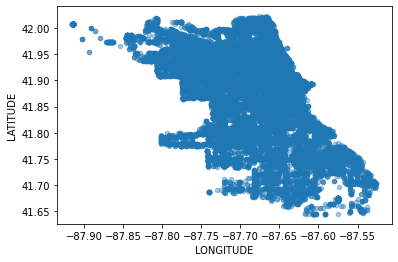

In [18]:
data.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4)
plt.show()

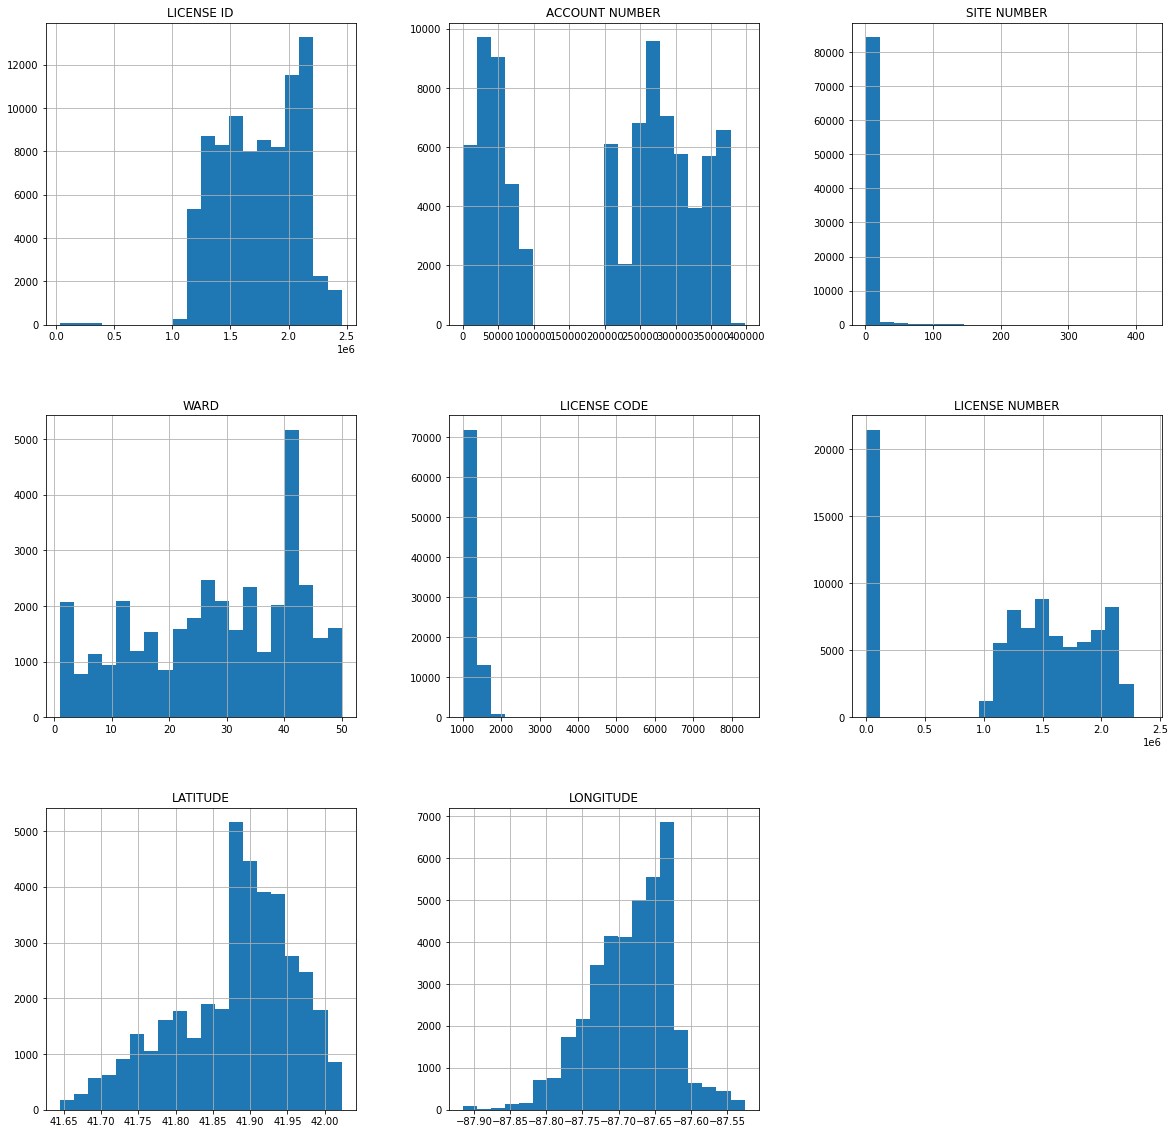

In [24]:
#Makes a Histogram
def pd_hist(df,bins,attribute=False):
    if bool(attribute) == True:
        test_df = df[attribute]
        hist = test_df.hist(bins=bins,figsize=(20,20))
    else:
        hist = df.hist(bins=bins,figsize=(20,20))
        
pd_hist(data, 20)